/Users/ehsanmacpro2022/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/ehsanmacpro2022/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/ehsanmacpro2022/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


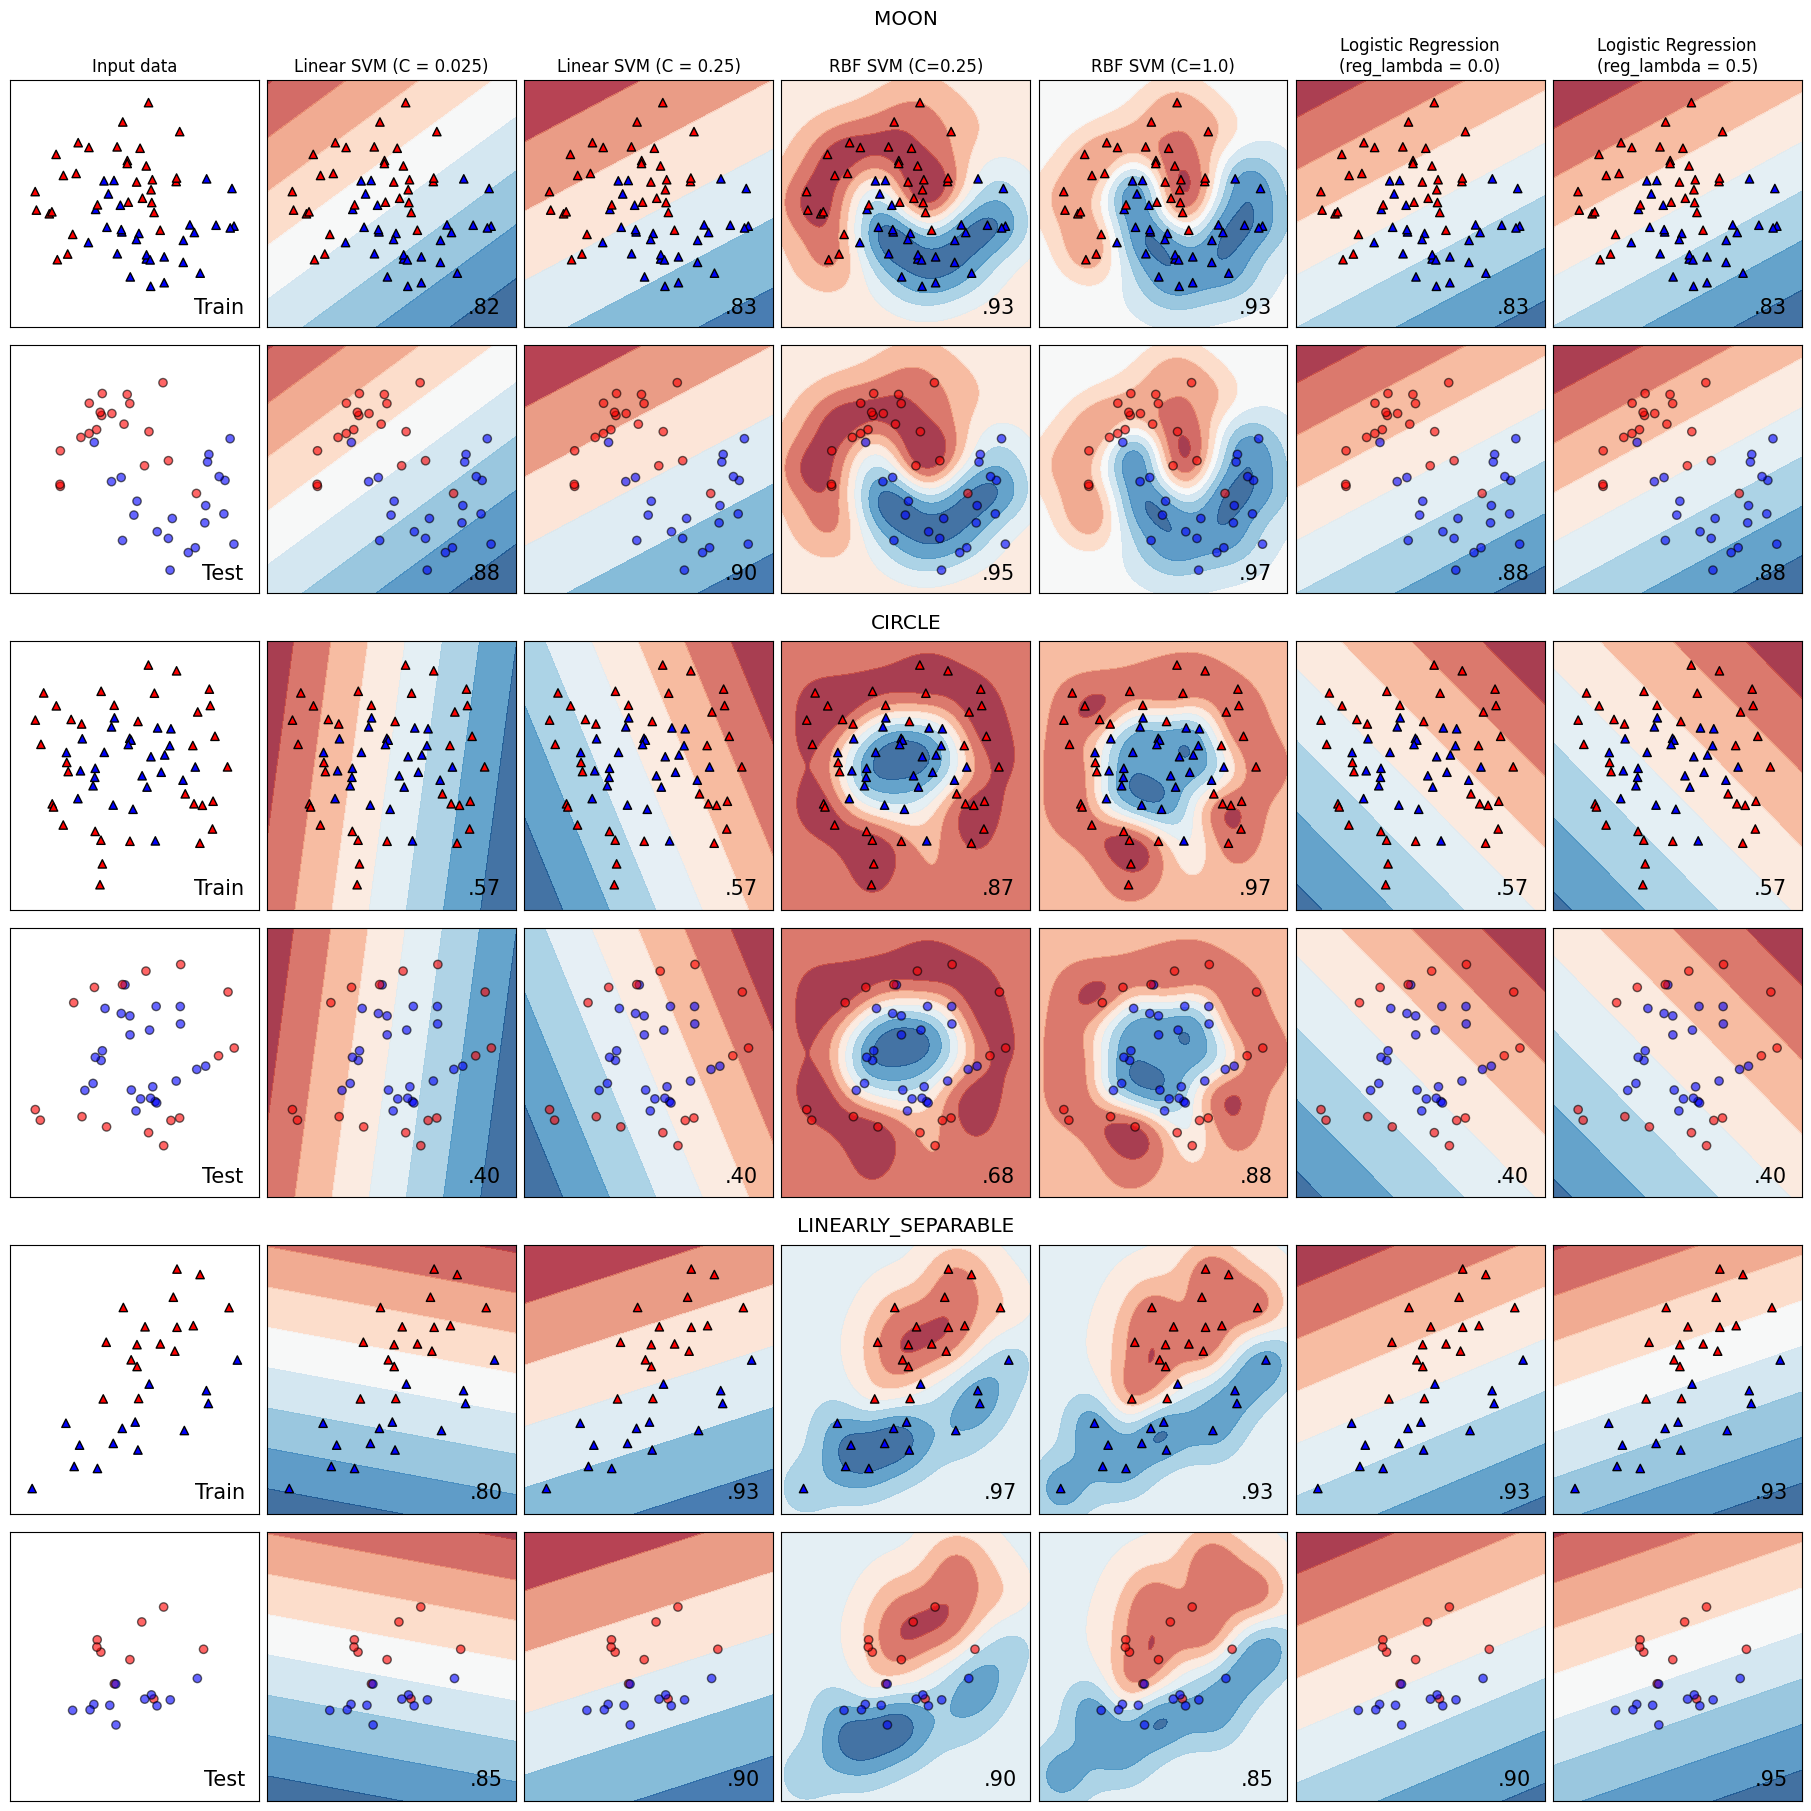

In [1]:


# Code modified from https://scikit-learn.org/1.0/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
# Original Code source: Gaël Varoquaux
#                       Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

########################################
# Define the classifiers to be studied #
########################################
names = [
    "Linear SVM (C = 0.025)",
    "Linear SVM (C = 0.25)",
    "RBF SVM (C=0.25)",
    "RBF SVM (C=1.0)",
    "Logistic Regression\n(reg_lambda = 0.0)",
    "Logistic Regression\n(reg_lambda = 0.5)"
]



classifiers = [
    SVC(kernel="linear", C=0.025),  # C controls the penalty term for misclassifying training data
    SVC(kernel="linear", C=0.25),   # Smaller C means stronger regularization
    SVC(kernel="rbf", gamma=2, C=0.25),
    SVC(kernel="rbf", gamma=2, C=1),
    LogisticRegression(penalty='none'),     # none sets regularization term to 0
    LogisticRegression(penalty='l2', C=2.0) # C is the inverse regularization strength i.e. smaller C means stronger regularization
]

"""
SVC(kernel="linear", C=0.025):

This is a Support Vector Classifier (SVC) with a linear kernel.
Parameter C=0.025 controls the penalty term for misclassifying training data. Smaller values of C mean stronger regularization, which helps in preventing overfitting.
SVC(kernel="linear", C=0.25):

Similar to the first SVC, but with a slightly larger C.
C=0.25 implies a relatively weaker regularization compared to the previous one.
SVC(kernel="rbf", gamma=2, C=0.25):

This SVC uses a radial basis function (RBF) kernel, which is capable of handling non-linear decision boundaries.
gamma=2 controls the influence of individual training samples. Higher values of gamma lead to a tighter decision boundary.
C=0.25 implies moderate regularization.
SVC(kernel="rbf", gamma=2, C=1):

Another RBF kernel SVC with the same gamma value but a higher C.
C=1 suggests weaker regularization compared to the previous RBF kernel.
LogisticRegression(penalty='none'):

Logistic Regression classifier with no regularization (penalty='none').
This means the model won't penalize large coefficient values, which might lead to overfitting, especially with high-dimensional data.
LogisticRegression(penalty='l2', C=2.0):

Logistic Regression with L2 regularization (penalty='l2').
C=2.0 is the inverse regularization strength. Higher values of C indicate weaker regularization, meaning the model is allowed to fit the training data more closely.

"""

######################################
# Sample the classification datasets #
######################################
# We will look at two datasets where the classes are not linearly separable.
# The third dataset is linearly separable save for a few noisy datapoints.
X, y = make_classification(
    n_samples=50, n_features=2, n_redundant=0, n_informative=2, random_state=1, 
    n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    ('MOON', make_moons(noise=0.3, random_state=0)),
    ('CIRCLE', make_circles(noise=0.2, factor=0.5, random_state=1)),
    ('LINEARLY_SEPARABLE', linearly_separable),
]


"""
Generating Linearly Separable Dataset:

X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

    This line generates a linearly separable dataset with 50 samples, 2 features, and 2 informative features (useful for classification).
    n_redundant=0 indicates no redundant features.

    n_clusters_per_class=1 specifies that there is only one cluster per class, ensuring linear separability.

rng = np.random.RandomState(2)

    This initializes a random number generator with a seed of 2.

X += 2 * rng.uniform(size=X.shape)

    This line adds uniformly distributed noise to the dataset X to make it more scattered and less linearly separable.

linearly_separable = (X, y)
    This tuple stores the linearly separable dataset as (X, y).

Generating Non-linear Datasets:

datasets = [ ('MOON', make_moons(noise=0.3, random_state=0)), ('CIRCLE', make_circles(noise=0.2, factor=0.5, random_state=1)), ('LINEARLY_SEPARABLE', linearly_separable), ]

This part creates a list of tuples named datasets, each containing the name of the dataset and the dataset itself.

For the first dataset, named 'MOON', it uses make_moons to generate moon-shaped clusters with added noise.
For the second dataset, named 'CIRCLE', it uses make_circles to generate concentric circles with added noise.
For the third dataset, named 'LINEARLY_SEPARABLE', it uses the previously generated linearly separable dataset.

"""

############################
# Plot classifier behavior #
############################
h = 0.02  # step size in the mesh
figure = plt.figure(constrained_layout=True, figsize=(18, 18))
subfigs = figure.subfigures(len(datasets), 1)
subfig_arr = [subfig for subfig in subfigs.flat]

# iterate over datasets
for ds_cnt, (ds_nm, ds) in enumerate(datasets):
    subfig = subfig_arr[ds_cnt]
    subfig.suptitle(ds_nm, fontsize='x-large')
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )


    """
Assigning Variables:

    X, y = ds: This line unpacks the dataset ds into feature matrix X and target vector y.
    Standardizing Features:
    
    X = StandardScaler().fit_transform(X): Here, the feature matrix X is standardized using StandardScaler. This step ensures that each feature has a mean of 0 and a standard deviation of 1, making them comparable and improving the performance of certain machine learning algorithms.
    Splitting Data into Train and Test Sets:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42): This line splits the standardized feature matrix X and target vector y into training and testing sets.
    test_size=0.4 specifies that 40% of the data will be used for testing, and the remaining 60% will be used for training.
    random_state=42 sets a seed for reproducibility, ensuring that the split is the same each time the code is run.

    A seed, in the context of random number generation, is a starting point used by a random number generator (RNG) to produce a sequence of pseudo-random numbers. Pseudo-random numbers are generated deterministically based on a mathematical algorithm, rather than being truly random.

    """

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Col 1: just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    axs = subfig.subplots(2, len(classifiers) + 1)
    i = 0
    ax_tr = axs[0, i]
    ax_te = axs[1, i]
    if ds_cnt == 0:
        ax_tr.set_title("Input data")
    # Plot the training points
    ax_tr.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k", marker='^')
    # Plot the testing points
    ax_te.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax_tr.set_xlim(xx.min(), xx.max())
    ax_tr.set_ylim(yy.min(), yy.max())
    ax_tr.set_xticks(())
    ax_tr.set_yticks(())
    ax_tr.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        "Train",
        size=15,
        horizontalalignment="right",
    )
    
    ax_te.set_xlim(xx.min(), xx.max())
    ax_te.set_ylim(yy.min(), yy.max())
    ax_te.set_xticks(())
    ax_te.set_yticks(())
    
    ax_te.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        "Test",
        size=15,
        horizontalalignment="right",
    )
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax_tr = axs[0, i]
        ax_te = axs[1, i]
        clf.fit(X_train, y_train)  #fit() is a method of the classifier/regressor object, used to train the model.
        score = clf.score(X_test, y_test)
        score_train = clf.score(X_train, y_train)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax_tr.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        ax_te.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax_tr.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k", marker='^'
        )
        # Plot the testing points
        ax_te.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax_tr.set_xlim(xx.min(), xx.max())
        ax_tr.set_ylim(yy.min(), yy.max())
        ax_tr.set_xticks(())
        ax_tr.set_yticks(())
        ax_tr.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score_train).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        if ds_cnt == 0:
            ax_tr.set_title(name)
        ax_te.set_xlim(xx.min(), xx.max())
        ax_te.set_ylim(yy.min(), yy.max())
        ax_te.set_xticks(())
        ax_te.set_yticks(())
        ax_te.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.show()

### Linear Support Vector Machine (SVM):

- **Principle:** Linear SVM is a supervised learning algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space.
- **Working:** It tries to maximize the margin between the classes, i.e., the distance between the hyperplane and the nearest data point from each class, ensuring robust generalization to new data.
- **Advantages:**
  - Effective in high-dimensional spaces.
  - Memory efficient.
  - Effective when the number of features is greater than the number of samples.
- **Disadvantages:**
  - Not suitable for non-linear data unless transformed into higher-dimensional space (kernel trick), which can be computationally expensive.
- **Use Cases:** Linear SVM is often used in text classification tasks, such as spam detection, sentiment analysis, and document categorization.

### Radial Basis Function (RBF) Support Vector Machine (SVM):

- **Principle:** RBF SVM is an extension of the linear SVM where it is capable of non-linear classification by implicitly mapping the input data into a higher-dimensional feature space through the use of kernel functions.
- **Working:** It uses a Gaussian radial basis function kernel to map the input data into a higher-dimensional space where classes become linearly separable, thus allowing for non-linear decision boundaries.
- **Advantages:**
  - Capable of capturing complex, non-linear relationships in the data.
  - Effective even when the relationship between features and target is not well understood.
- **Disadvantages:**
  - Susceptible to overfitting, especially with high-dimensional data or small datasets.
  - Tuning the hyperparameters, such as the kernel width and regularization parameter, can be challenging.
- **Use Cases:** RBF SVM is commonly used in bioinformatics, image recognition, and various other fields where the data exhibits non-linear patterns.

### Logistic Regression:

- **Principle:** Despite its name, logistic regression is a classification algorithm, not a regression one. It models the probability of a binary outcome by fitting the data to a logistic function.
- **Working:** Logistic regression calculates the probability that a given input belongs to a particular class using the logistic function (sigmoid function). It optimizes the coefficients (weights) of the input features using maximum likelihood estimation.
- **Advantages:**
  - Simple and interpretable model.
  - Efficient training and prediction, particularly for large datasets.
  - Outputs probabilities, which can be useful for decision-making.
- **Disadvantages:**
  - Assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true.
  - Limited to binary classification unless extended to multinomial logistic regression.
- **Use Cases:** Logistic regression is widely used in medical, social sciences, and business applications, such as predicting disease risk, customer churn, or loan default.
